In [1]:
from matplotlib import pyplot as plt
import numpy as np
import affine_invariant as af
from scipy.stats import norm, uniform
from time import time

/home/alisyaifudin/anaconda3/envs/maturin/lib/python3.8/site-packages/scipy/__init__.py:138: UserWarning: A NumPy version >=1.16.5 and <1.23.0 is required for this version of SciPy (detected version 1.23.5)
  warnings.warn(f"A NumPy version >={np_minversion} and <{np_maxversion} is required for this version of "


In [2]:
# plt.style.available

In [3]:
plt.style.use('seaborn-v0_8-bright') # I personally prefer seaborn for the graph style, but you may choose whichever you want.
params = {"ytick.color" : "black",
          "xtick.color" : "black",
          "axes.labelcolor" : "black",
          "axes.edgecolor" : "black",
          "text.usetex" : True,
          "font.family" : "serif",
          "font.serif" : ["Computer Modern"]}
plt.rcParams.update(params)

In [4]:
rhob = [
    0.0104, 0.0277, 0.0073, 0.0005, 0.0006, 0.0018,
    0.0018, 0.0029, 0.0072, 0.0216, 0.0056, 0.0015
]
e_rhob = []

sigmaz = [
    3.7, 7.1, 22.1, 39.0, 15.5, 7.5, 12.0, 
    18.0, 18.5, 18.5, 20.0, 20.0]
e_sigmaz = []

rhoDM = [0.016]
e_rhoDM = [0.001]

# sigmaDD = [7]
# e_sigmaDD = [1]

# hDD = [65]
# e_hDD = [5]

R = [3.4E-3]
e_R = [0.1E-3]

zsun = [0]
e_zsun = [1]

sigmaw = [10.]
e_sigmaw = [1.]

w0 = [-7]
e_w0 = [1.]

# theta = np.array([rhob + sigmaz + rhoDM + sigmaDD + hDD + R + zsun + sigmaw + w0]).flatten()
theta = np.array([rhob + sigmaz + rhoDM + R + zsun + sigmaw + w0]).flatten()
theta.shape

(29,)

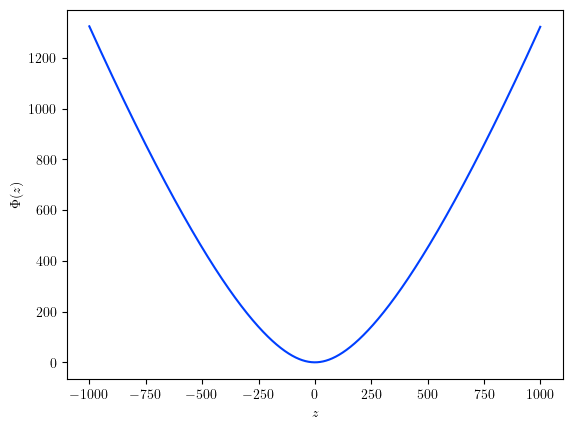

In [5]:
z_start = -1000
z_end = 1000
dz = 1.

z = np.arange(z_start, z_end, dz)

phi = af.potential(z, theta)

plt.plot(z, phi)
plt.xlabel(r'$z$')
plt.ylabel(r'$\Phi(z)$')
plt.show()

In [12]:
ndim = len(theta)
nwalkers = 2*ndim+6
nsteps = 100

In [13]:
rhob = [0.0104, 0.0277, 0.0073, 0.0005, 0.0006, 0.0018, 0.0018, 0.0029, 0.0072, 0.0216, 0.0056, 0.0015]
e_rhob = [0.00312, 0.00554, 0.00070, 0.00003, 0.00006, 0.00018, 0.00018, 0.00029, 0.00072, 0.00280,
    0.00100, 0.00050]
sigmaz = [3.7, 7.1, 22.1, 39.0, 15.5, 7.5, 12.0, 18.0, 18.5, 18.5, 20.0, 20.0]
e_sigmaz = [0.2, 0.5, 2.4, 4.0, 1.6, 2.0, 2.4, 1.8, 1.9, 4.0, 5.0, 5.0]

In [14]:
locs = {
    'rhob' : rhob,
    'sigmaz': sigmaz,
    'rhoDM': -0.01,
    'R': 3.4E-3,
    'zsun': -50.,
    'sigmaw':1.,
    'w0': -15.
}
scales = {
    'rhob' : e_rhob,
    'sigmaz': e_sigmaz,
    'rhoDM': 0.15,
    'R': 0.6E-3,
    'zsun': 100.,
    'sigmaw': 20.,
    'w0': 10.
}

rhob_0 = norm.rvs(loc=locs['rhob'], scale=scales['rhob'], size=(nwalkers, 12))
sigmaz_0 = norm.rvs(loc=locs['sigmaz'], scale=scales['sigmaz'], size=(nwalkers, 12))

rhoDM_0 = uniform.rvs(loc=locs['rhoDM'], scale=scales['rhoDM'], size=nwalkers)
R_0 = uniform.rvs(loc=locs['R'], scale=scales['R'], size=nwalkers)
zsun_0 = uniform.rvs(loc=locs['zsun'], scale=scales['zsun'], size=nwalkers)
sigmaw_0 = uniform.rvs(loc=locs['sigmaw'], scale=scales['sigmaw'], size=nwalkers)
w0_0 = uniform.rvs(loc=locs['w0'], scale=scales['w0'], size=nwalkers)

p0 = np.array([*rhob_0.T, *sigmaz_0.T, rhoDM_0, R_0, zsun_0, sigmaw_0, w0_0]).T
p0.shape

(64, 29)

In [15]:
zdata = np.loadtxt('z.csv', skiprows=1, delimiter=',')
zmid = zdata[:, 0]
znum = zdata[:, 1]
zerr = zdata[:, 2]
dz = zmid[1] - zmid[0]

wdata = np.loadtxt('w.csv', skiprows=1, delimiter=',')
wmid = wdata[:, 0]
wnum = wdata[:, 1]
werr = wdata[:, 2]
dw = wmid[1] - wmid[0]
zbound = 50

zdata = (zmid, znum, zerr, dz)
wdata = (wmid, wnum, werr, dw, zbound)

In [16]:
p0.shape

(64, 29)

In [17]:
sampler = af.mcmc(nsteps, nwalkers, p0, zdata, wdata, True)

Acceptance rate: 0.32578125


 68%|██████▉   | 66/100 [00:04<00:02, 16.27it/s]

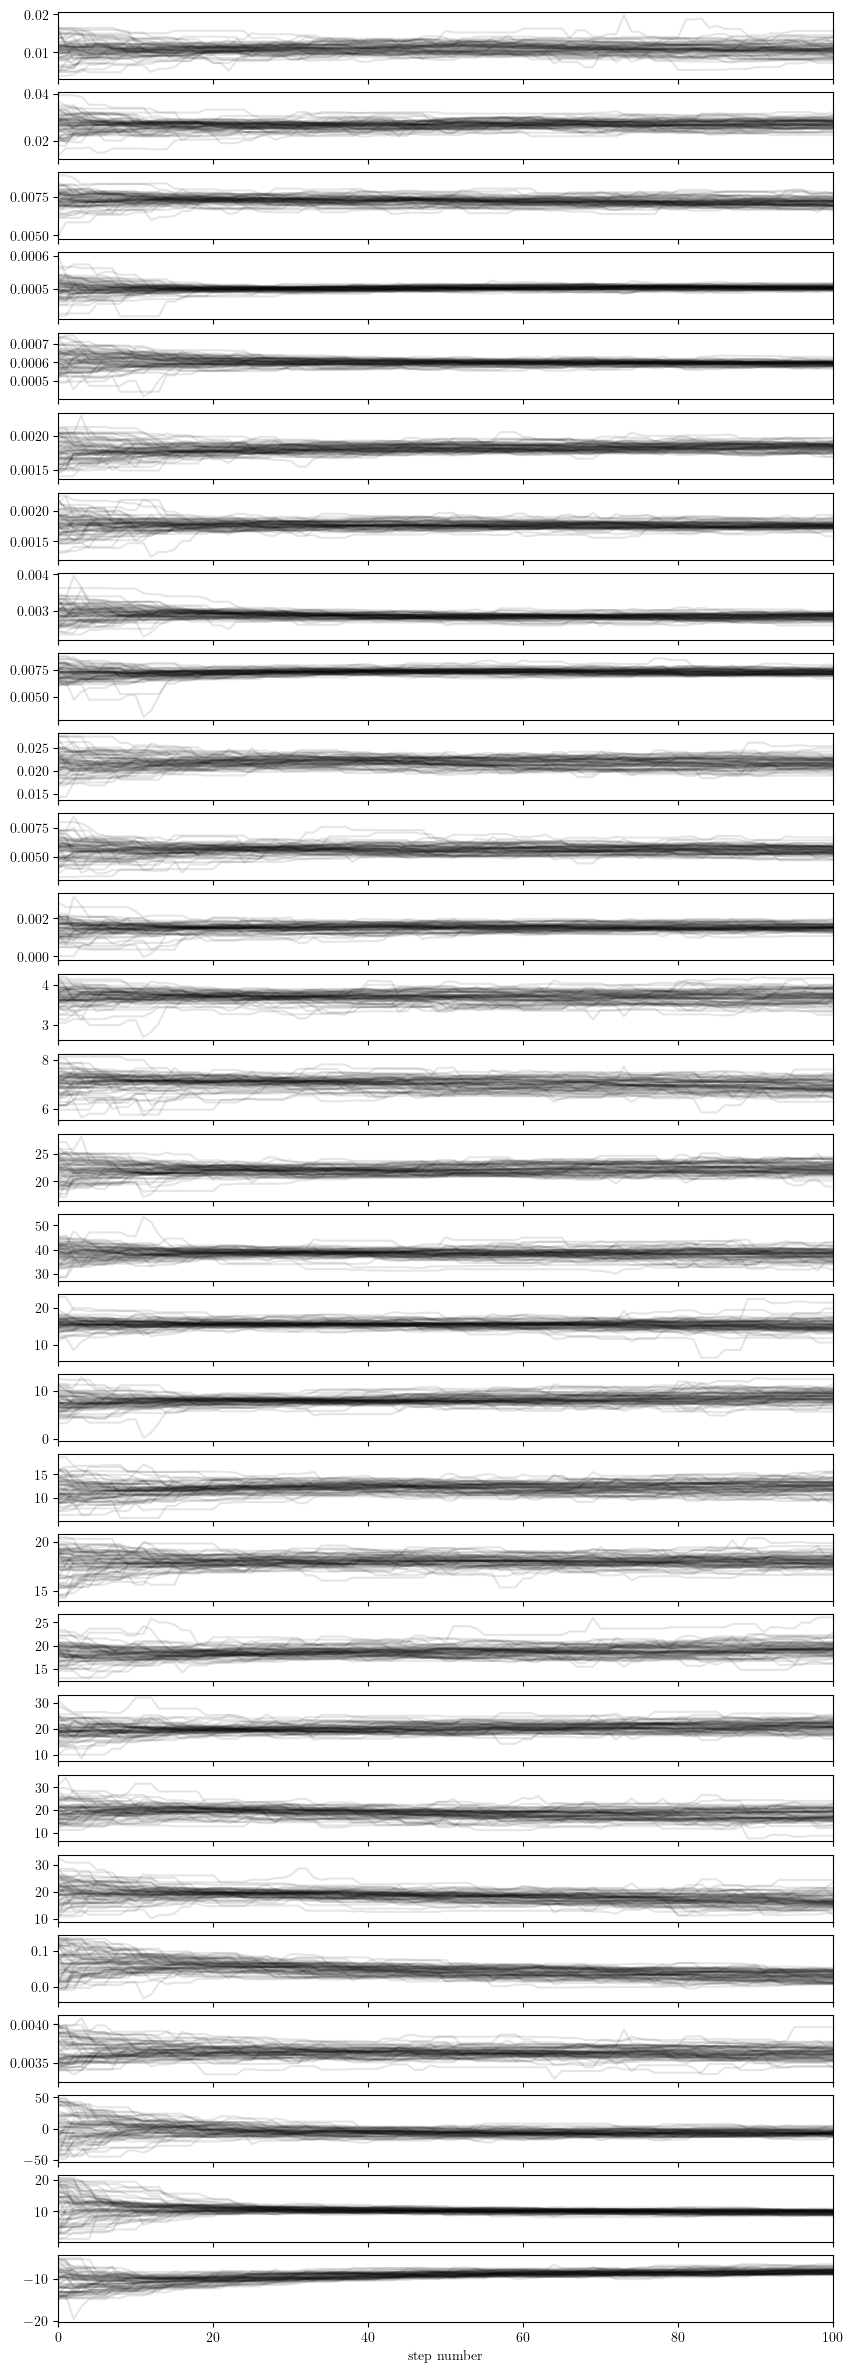

In [18]:
# plot
fig, axes = plt.subplots(29, 1, figsize=(10, 30), sharex=True)
for i in range(29):
    axes[i].plot(sampler[:, :, i], color="k", alpha=0.01)
    axes[i].set_xlim(0, len(sampler)-1)
axes[-1].set_xlabel("step number")
plt.show()

In [22]:
p0_next = sampler[-1, :, :]
sampler = af.mcmc(nsteps, nwalkers, p0_next, zdata, wdata, True)

Acceptance rate: 0.28625


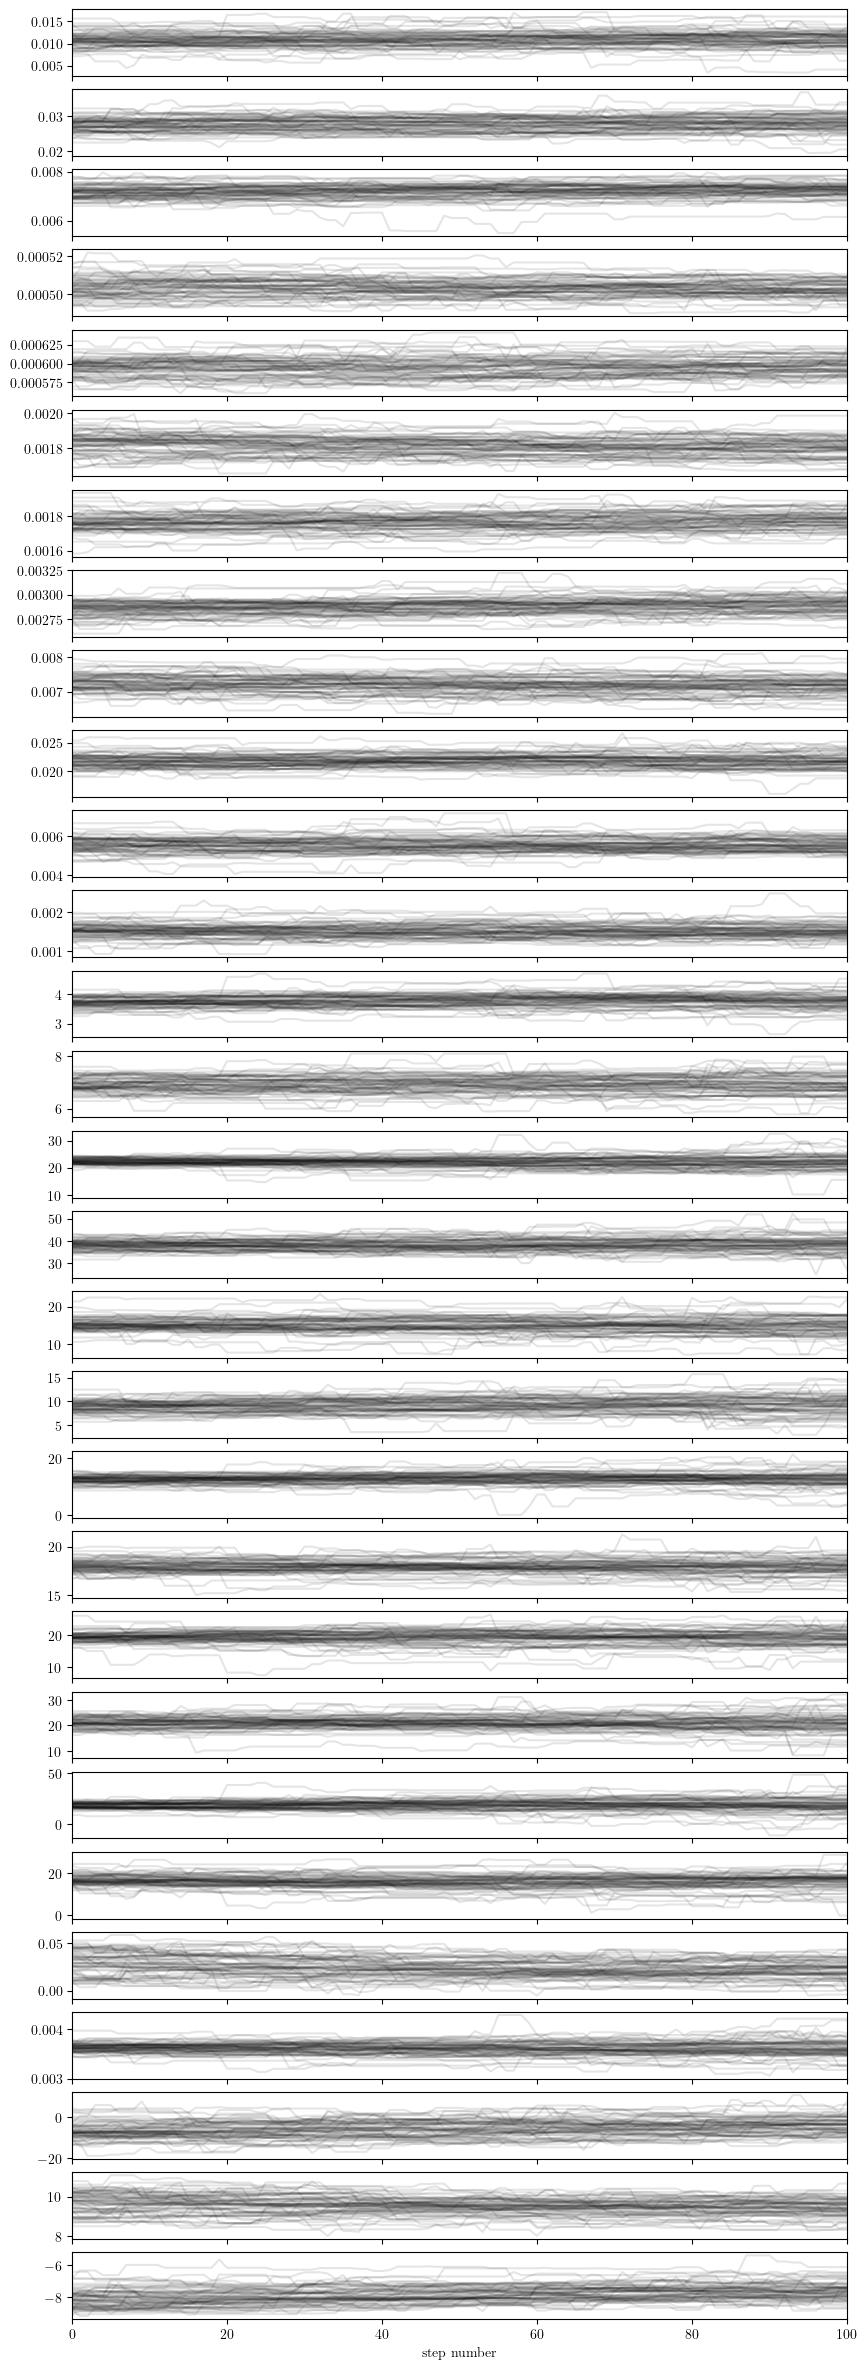

In [24]:
# plot
fig, axes = plt.subplots(29, 1, figsize=(10, 30), sharex=True)
for i in range(29):
    axes[i].plot(sampler[:, :, i], color="k", alpha=0.1)
    axes[i].set_xlim(0, len(sampler)-1)
axes[-1].set_xlabel("step number")
plt.show()

In [25]:
import pandas as pd

df_com = []
df_dict = {}

for i in range(nwalkers):
    chain = sampler[:, i, :]
    for j in range(12):
        df_dict[f'rhob_{j}'] = chain[:, j]
        df_dict[f'sigmaz_{j}'] = chain[:, j+12]
    df_dict['rhoDM'] = chain[:, 24]
    df_dict['R'] = chain[:, 25]
    df_dict['zsun'] = chain[:, 26]
    df_dict['sigmaw'] = chain[:, 27]
    df_dict['w0'] = chain[:, 28]
    df_dict['walker'] = np.repeat(i, nsteps+1)
    df = pd.DataFrame(df_dict)
    if len(df_com) == 0:
        df_com = df
    else:
        df_com = pd.concat([df_com, df], ignore_index=True)
df_com

,rhob_0,sigmaz_0,rhob_1,sigmaz_1,rhob_2,sigmaz_2,rhob_3,sigmaz_3,rhob_4,sigmaz_4,...,rhob_10,sigmaz_10,rhob_11,sigmaz_11,rhoDM,R,zsun,sigmaw,w0,walker
0,0.010463,3.507686,0.027114,6.749885,0.006943,24.020307,0.000510,36.959426,0.000614,14.256637,...,0.004968,21.181060,0.001763,16.823314,0.035367,0.003659,-0.327071,9.664035,-8.477377,0
1,0.010463,3.507686,0.027114,6.749885,0.006943,24.020307,0.000510,36.959426,0.000614,14.256637,...,0.004968,21.181060,0.001763,16.823314,0.035367,0.003659,-0.327071,9.664035,-8.477377,0
2,0.010463,3.507686,0.027114,6.749885,0.006943,24.020307,0.000510,36.959426,0.000614,14.256637,...,0.004968,21.181060,0.001763,16.823314,0.035367,0.003659,-0.327071,9.664035,-8.477377,0
3,0.010463,3.507686,0.027114,6.749885,0.006943,24.020307,0.000510,36.959426,0.000614,14.256637,...,0.004968,21.181060,0.001763,16.823314,0.035367,0.003659,-0.327071,9.664035,-8.477377,0
4,0.010484,3.515533,0.026978,6.796460,0.006973,23.804405,0.000509,37.160799,0.000613,14.436205,...,0.005039,20.782357,0.001736,16.906251,0.034657,0.003668,-0.953112,9.667239,-8.489731,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
6459,0.013361,3.844087,0.027217,6.721775,0.007497,24.312680,0.000507,35.950537,0.000591,13.943981,...,0.005200,9.423808,0.001644,19.490036,0.027358,0.003776,0.420640,9.695485,-7.429633,63
6460,0.013361,3.844087,0.027217,6.721775,0.007497,24.312680,0.000507,35.950537,0.000591,13.943981,...,0.005200,9.423808,0.001644,19.490036,0.027358,0.003776,0.420640,9.695485,-7.429633,63
6461,0.013361,3.844087,0.027217,6.721775,0.007497,24.312680,0.000507,35.950537,0.000591,13.943981,...,0.005200,9.423808,0.001644,19.490036,0.027358,0.003776,0.420640,9.695485,-7.429633,63
6462,0.013361,3.844087,0.027217,6.721775,0.007497,24.312680,0.000507,35.950537,0.000591,13.943981,...,0.005200,9.423808,0.001644,19.490036,0.027358,0.003776,0.420640,9.695485,-7.429633,63


In [29]:
df_com.to_csv('chain.csv', index=False)

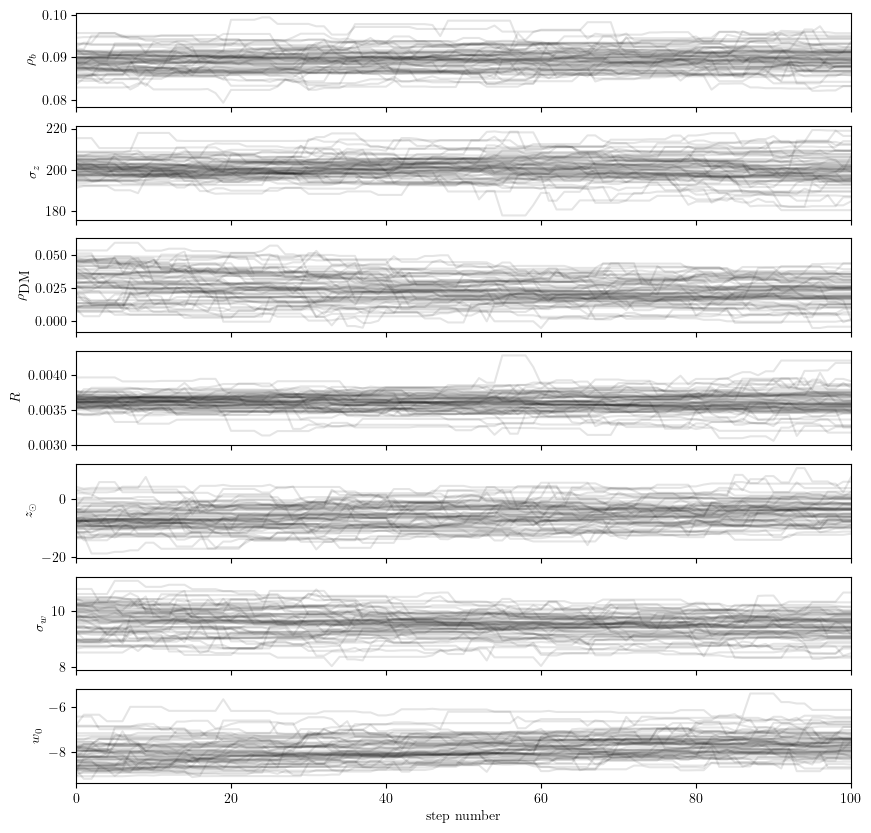

In [49]:
rhob = sampler[:, :, :12].sum(axis=2)
sigmaz = sampler[:, :, 12:24].sum(axis=2)
rhoDM = sampler[:, :, 24]
R = sampler[:, :, 25]
zsun = sampler[:, :, 26]
sigmaw = sampler[:, :, 27]
w0 = sampler[:, :, 28]

chain = np.array([rhob, sigmaz, rhoDM, R, zsun, sigmaw, w0])
# # chain.shape
labels = [r'$\rho_b$', r'$\sigma_z$', r'$\rho_{\textup{DM}}$', r'$R$', r'$z_{\odot}$', r'$\sigma_w$', r'$w_0$']
fig, axes = plt.subplots(7, 1, figsize=(10, 10), sharex=True)
for i in range(7):
    axes[i].plot(chain[i], color="k", alpha=0.1)
    axes[i].set_xlim(0, len(sampler)-1)
    axes[i].set_ylabel(labels[i])
axes[-1].set_xlabel("step number")
plt.show()

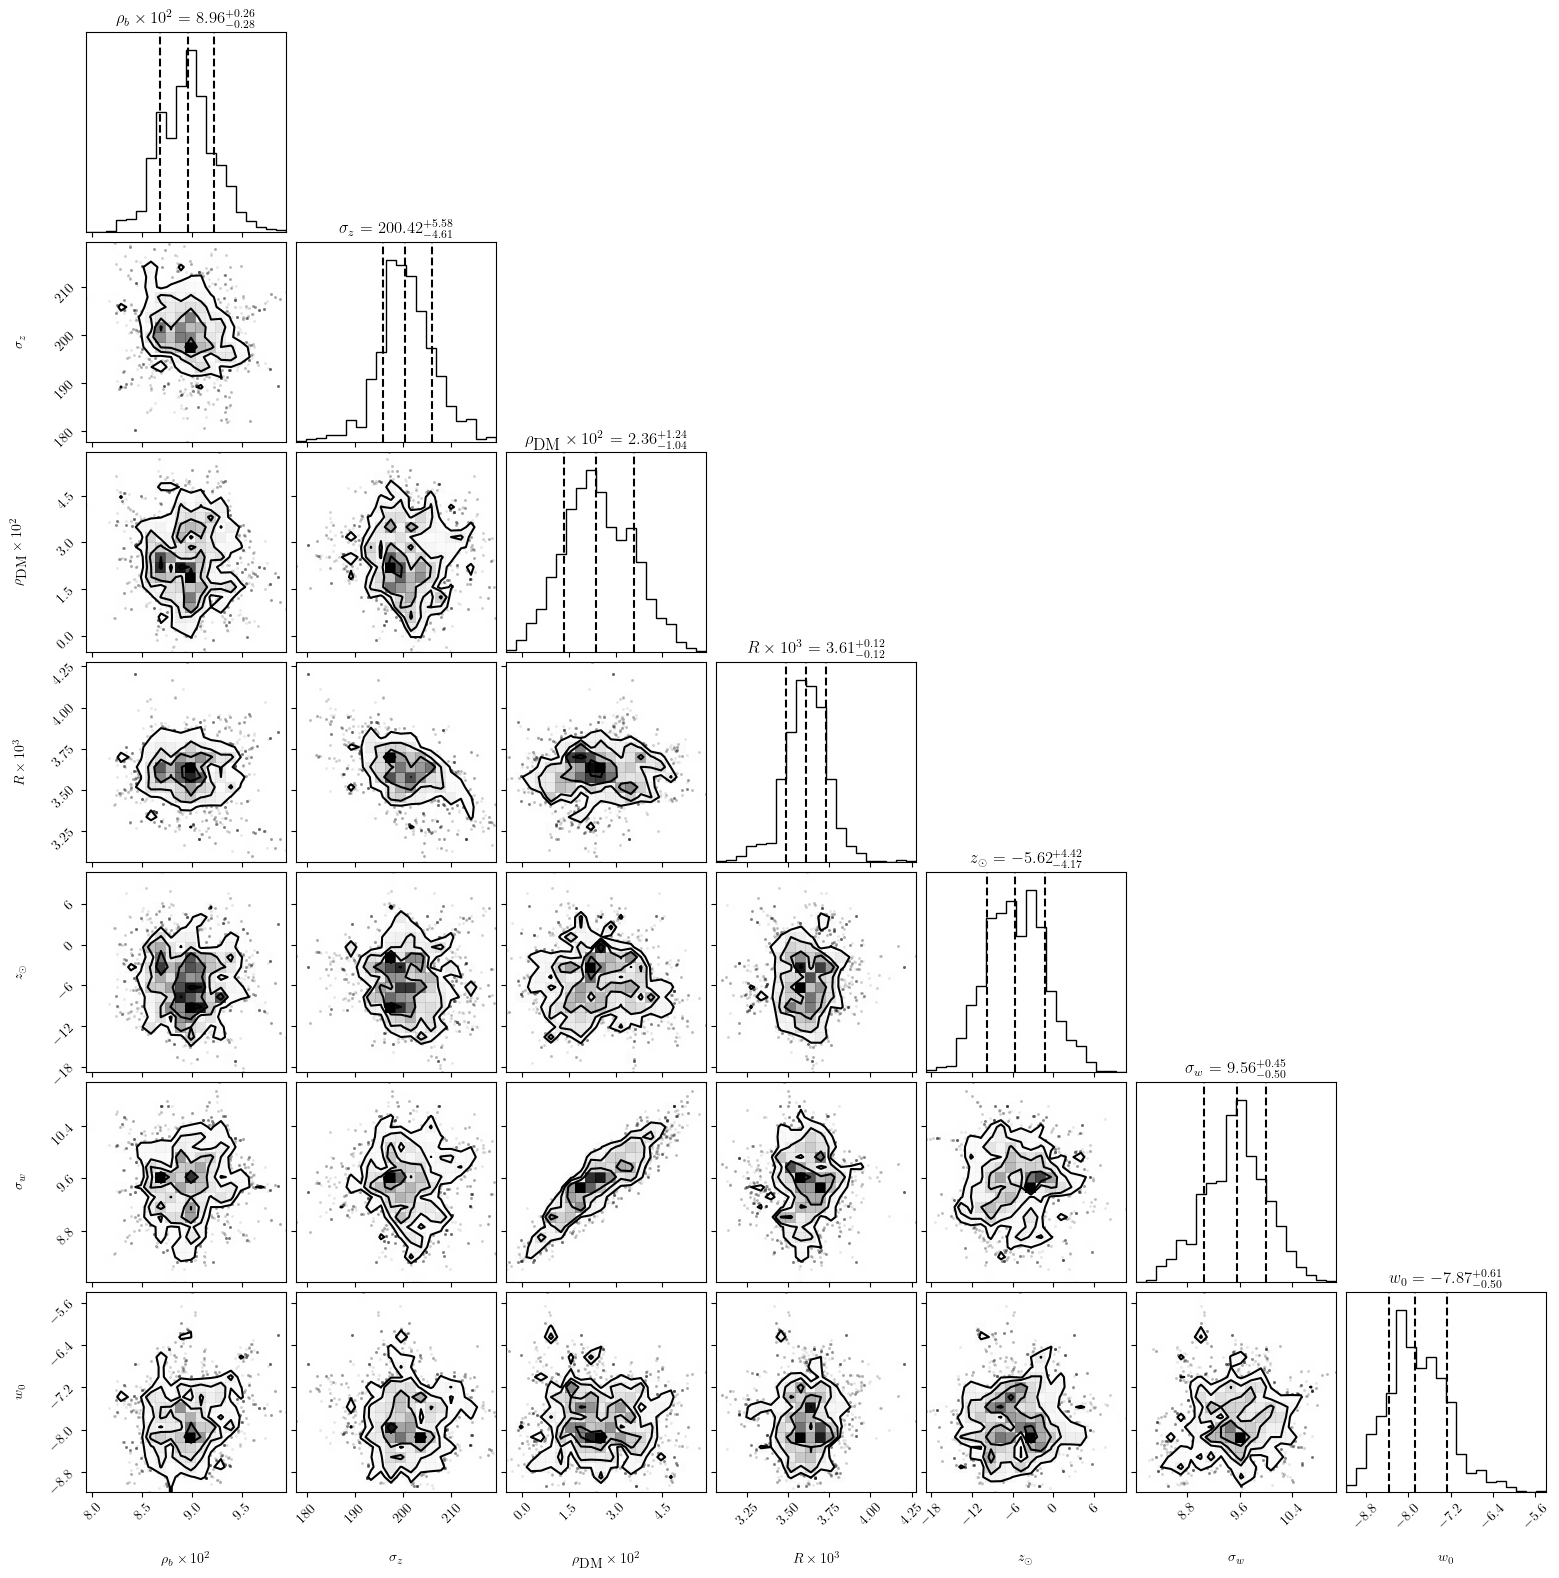

In [53]:
import corner

rhob_f = rhob.reshape(-1)/1E-2
sigmaz_f = sigmaz.reshape(-1)
rhoDM_f = rhoDM.reshape(-1)/1E-2
R_f = R.reshape(-1)/1E-3
zsun_f = zsun.reshape(-1)
sigmaw_f = sigmaw.reshape(-1)
w0_f = w0.reshape(-1)

flat_samples = np.array([rhob_f, sigmaz_f, rhoDM_f, R_f, zsun_f, sigmaw_f, w0_f])
labels = [r'$\rho_b\times 10^2$', r'$\sigma_z$', r'$\rho_{\textup{DM}}\times 10^2$', r'$R\times 10^3$', r'$z_{\odot}$', r'$\sigma_w$', r'$w_0$']


fig = corner.corner(
    flat_samples.T, labels=labels, quantiles=[0.16, 0.5, 0.84], show_titles=True, title_kwargs={"fontsize": 12}
)

In [27]:
flat_samples = sampler.reshape((-1, ndim))

(6464, 29)

100%|██████████| 100/100 [00:00<00:00, 603.17it/s]


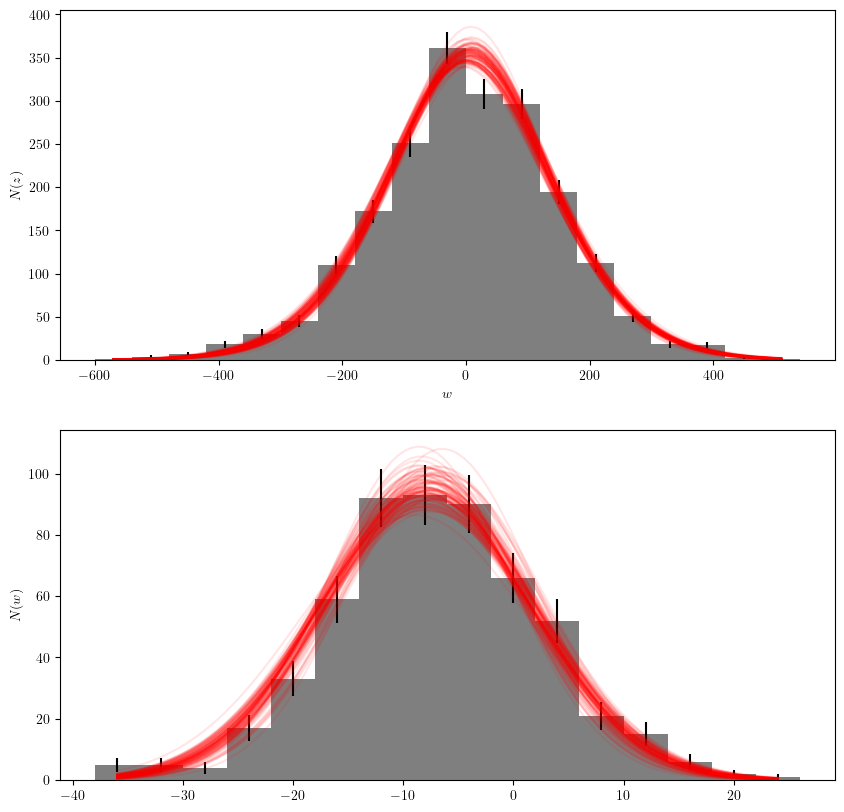

In [28]:
from tqdm import tqdm

Nz = znum.sum()
Nw = wnum.sum()

zs = np.linspace(zmid.min(), zmid.max(), 100)
ws = np.linspace(wmid.min(), wmid.max(), 100)

flat_samples = sampler[10:].reshape((-1, ndim))

fig, axes = plt.subplots(2, 1, figsize=(10, 10))
axes[0].bar(zmid, znum, yerr=zerr, width=dz, color='k', alpha=0.5)
axes[0].set_ylabel(r'$N(z)$')
axes[0].set_xlabel(r'$z$')
axes[1].bar(wmid, wnum, yerr=werr, width=dw, color='k', alpha=0.5)
axes[1].set_ylabel(r'$N(w)$')
axes[0].set_xlabel(r'$w$')
for i in tqdm(range(100)):
    ind = np.random.randint(len(flat_samples))
    theta = flat_samples[ind]
    Nz_mod = af.Nz1(zs, dz, Nz, theta)
    Nw_mod = af.Nw1(ws, dw, Nw, zbound, theta)
    axes[0].plot(zs, Nz_mod, color='r', alpha=0.1)
    axes[1].plot(ws, Nw_mod, color='r', alpha=0.1)
plt.show()

In [ ]:
Fw = np.trapz(FZW, z, axis=0)

plt.plot(w, Fw)

In [ ]:
def log_prior(z, w):
    resz = norm.logpdf(z, loc=-500, scale=1000)
    resw = norm.logpdf(w, loc=-30, scale=60)
    return resz + resw

def log_density(pos, theta):
    z, w = pos
    prior = log_prior(z, w)
    if not np.isfinite(prior):
        return -np.inf
    res = np.log(fzw(z, w, theta))
    return res

In [ ]:
import emcee

ndim = 2
nwalkers = 16

z_0 = np.random.uniform(-300, 300, nwalkers)
w_0 = np.random.uniform(-30, 30, nwalkers)

p0 = np.array([z_0, w_0]).T

sampler = emcee.EnsembleSampler(nwalkers, ndim, log_density, args=(theta,))

In [ ]:
nsteps = 2000
sampler.run_mcmc(p0, nsteps, progress=True);

In [ ]:
labels = [r'$z$', r'$w$']
samples = sampler.get_chain()

fig, axes = plt.subplots(2, 1, figsize=(10, 7), sharex=True)
for i, label in enumerate(labels):
    axes[i].plot(samples[:, :, i], "k", alpha=0.1)
    axes[i].set_xlim(0, nsteps)
    axes[i].set_ylabel(label)
axes[-1].set_xlabel("step number")
fig.tight_layout()
plt.show()

In [ ]:
z_samples = samples[200:, :, 0].flatten()
w_samples = samples[200:, :, 1].flatten()

fig, axes = plt.subplots(1, 2, figsize=(10, 3))
axes[0].hist(z_samples, 50, density=True)
axes[0].set_ylabel(r'$p(z)$')
axes[1].hist(w_samples, 50, density=True)
axes[1].set_ylabel(r'$p(w)$')
fig.tight_layout()
plt.show()

In [ ]:
Nz = 2000

indeks = np.arange(len(z_samples))

idx = np.random.choice(indeks, Nz, replace=False)
# idx = idx.sort()
# print(idx)
z = z_samples[idx]
w = w_samples[idx]
zbound = 50

mask = (z<zbound)*(z>-zbound)
w = w[mask]

fig, ax = plt.subplots(1, 2, figsize=(10, 5))
ax[0].hist(z, bins=20, density=True, color='c', ec='black', lw=0.5)
ax[0].set_xlabel(r'$z$')
ax[0].set_ylabel(r'$p(z)$')
ax[1].hist(w, bins=20, density=True, color='c', ec='black', lw=0.5)
ax[1].set_xlabel(r'$w$')
ax[1].set_ylabel(r'$p(w)$')
plt.show()

In [ ]:
znum, zedge = np.histogram(z, bins=20, range=(-600, 600))
wnum, wedge = np.histogram(w, bins=20, range=(-50, 30))

dz = zedge[1] - zedge[0]
dw = wedge[1] - wedge[0]

mask = znum>0
znum = znum[mask]

zmid = (zedge[1:] + zedge[:-1])/2
zmid = zmid[mask]

mask = wnum>0
wnum = wnum[mask]
wmid = (wedge[1:] + wedge[:-1])/2
wmid = wmid[mask]

zerr = np.sqrt(znum)
werr = np.sqrt(wnum)

fig, ax = plt.subplots(1, 2, figsize=(10, 5))
ax[0].errorbar(zmid, znum, yerr=zerr, fmt='.', color='c', ecolor='black', elinewidth=0.5, capsize=2)
ax[0].set_xlabel(r'$z$')
ax[0].set_ylabel(r'$N(z)$')
ax[1].errorbar(wmid, wnum, yerr=werr, fmt='.', color='c', ecolor='black', elinewidth=0.5, capsize=2)
ax[1].set_xlabel(r'$w$')
ax[1].set_ylabel(r'$N(w)$')
plt.show()

znum.sum(), wnum.sum()

In [ ]:
import pandas as pd

df_z = pd.DataFrame({'z': zmid, 'Nz': znum, 'errz': zerr})
df_w = pd.DataFrame({'w': wmid, 'Nw': wnum, 'errw': werr})
zbound

In [ ]:
df_z.to_csv("z.csv", index=False)
df_w.to_csv("w.csv", index=False)

In [ ]:
dz = zedge[1] - zedge[0]
dw = wedge[1] - wedge[0]

Nz_tot = znum.sum()
Nw_tot = wnum.sum()
zs = np.linspace(-600, 600, 100)
ws = np.linspace(-50, 30, 100)

Nz_mod = af.Nz1(zs, dz, Nz_tot, theta)
Nw_mod = af.Nw1(ws, dw, Nw_tot, zbound, theta)

# plot
fig, ax = plt.subplots(1, 2, figsize=(10, 5))
ax[0].errorbar(zmid, znum, yerr=zerr, fmt='.', color='c', ecolor='black', elinewidth=0.5, capsize=2)
ax[0].plot(zs, Nz_mod, color='r')
ax[0].set_xlabel(r'$z$')
ax[0].set_ylabel(r'$N(z)$')
ax[1].errorbar(wmid, wnum, yerr=werr, fmt='.', color='c', ecolor='black', elinewidth=0.5, capsize=2)
ax[1].plot(ws, Nw_mod, color='r')
ax[1].set_xlabel(r'$w$')
ax[1].set_ylabel(r'$N(w)$')
plt.show()

In [ ]:
a = np.arange(12)
b = np.arange(12, 24)
c = np.arange(24, 36)
ab = np.stack((a, b))
ab.shape